In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load the dataset
df = pd.read_csv('winequality-red.csv', sep=',', encoding='cp1252')



In [92]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
# Remove any missing values
df = df.dropna()

# Separate the features and the target variable
X = df.drop(['quality'], axis=1)
Y = df['quality']

# checking the distribution of features
df.describe()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


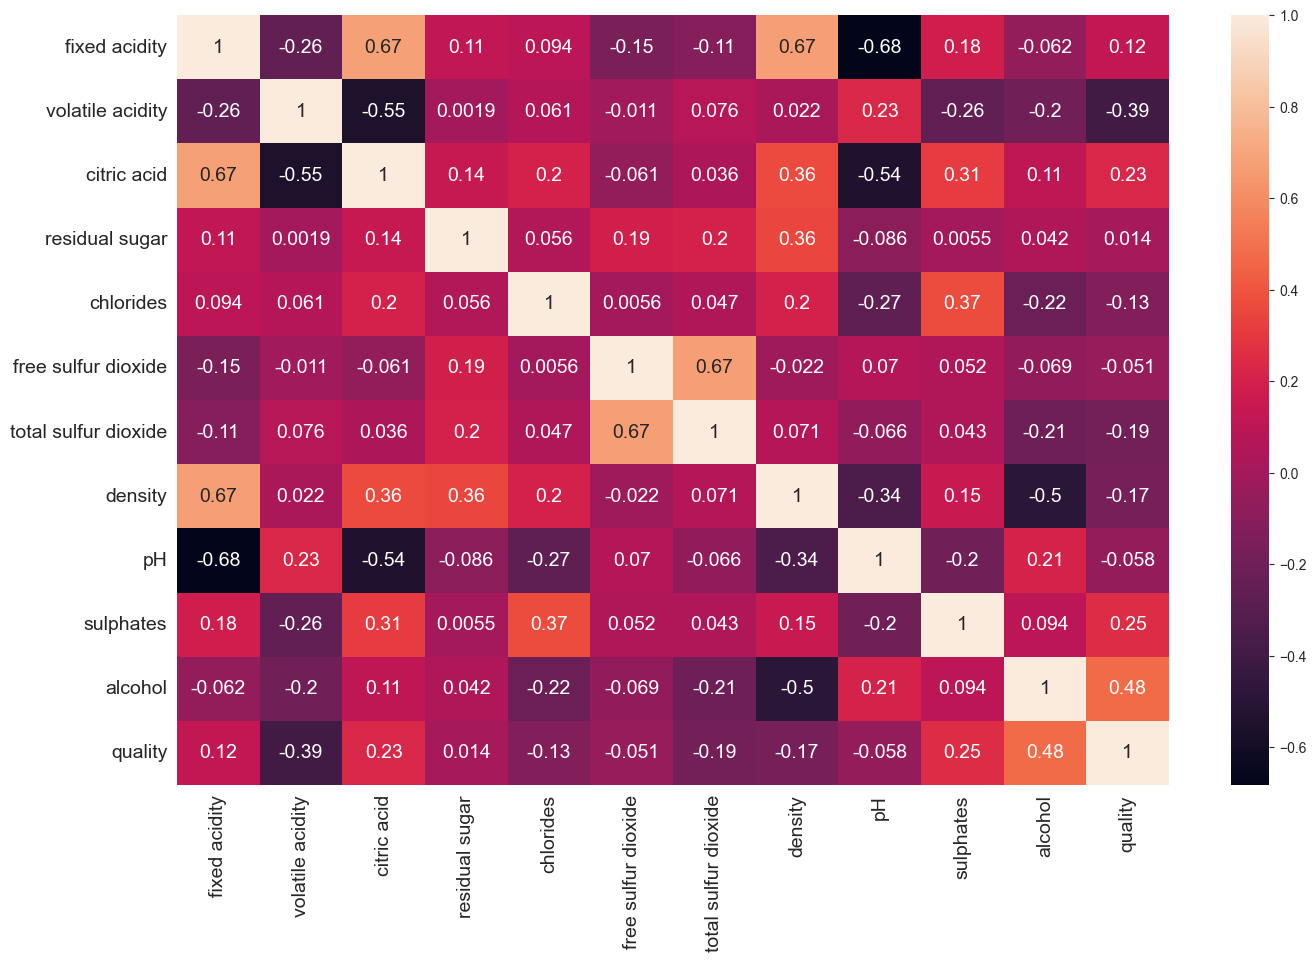

In [94]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [95]:
# Split the data into training and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(f'Sample size for training: {X_train.shape}, {Y_train.shape}')
print(f'Sample size for testing: {X_test.shape}, {Y_test.shape}')


Sample size for training: (1279, 11), (1279,)
Sample size for testing: (320, 11), (320,)


Linear univariate regression:
MSE = 0.5173 
Accuracy = 0.2249


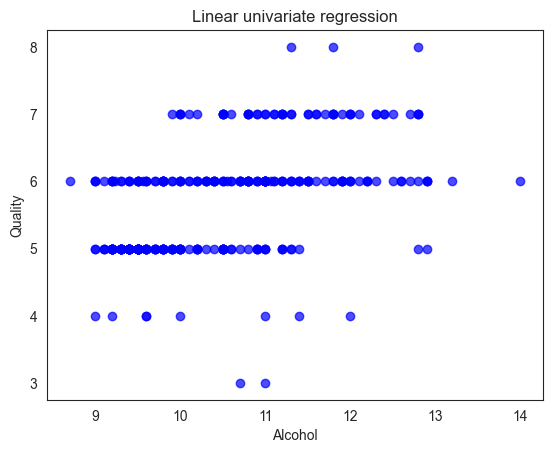

In [96]:

# Linear univariate regression
model = LinearRegression()
# Навчання моделі
model.fit(X_train.iloc[:, -1:], Y_train)
# Прогнозування для тестової вибірки
y_pred = model.predict(X_test.iloc[:, -1:])


mse = mean_squared_error(Y_test, y_pred)
accuracy = model.score(X_test.iloc[:, -1:], Y_test)
print("Linear univariate regression:")
print("MSE = {:.4f}".format(mse), "\nAccuracy = {:.4f}".format(accuracy))

plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Linear univariate regression')

plt.scatter(X_test.iloc[:, -1:], Y_test, alpha=0.7, color='blue')
plt.show()





Linear multivariate regression:
MSE = 0.4384 
Accuracy = 0.3431


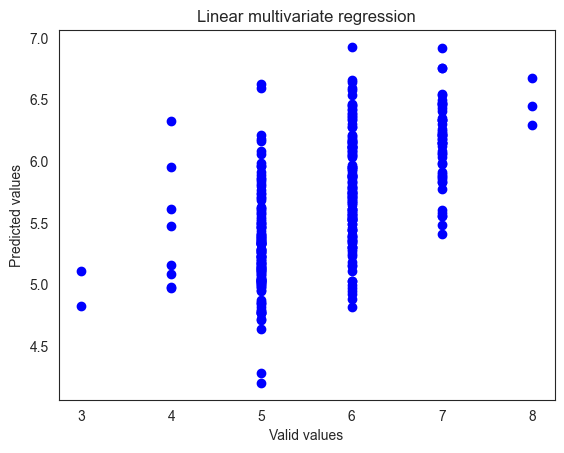

In [97]:
# Linear multivariate regression
model = LinearRegression()
# Навчання моделі
model.fit(X_train, Y_train)
# Прогнозування для тестової вибірки
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
accuracy = model.score(X_test, Y_test)
print("Linear multivariate regression:")
print("MSE = {:.4f}".format(mse), "\nAccuracy = {:.4f}".format(accuracy))

plt.scatter(Y_test, y_pred, color='blue')
plt.xlabel('Valid values')
plt.ylabel('Predicted values')
plt.title('Linear multivariate regression')
plt.show()


Polynomial regression with degree 2:
MSE = 0.4390 
Accuracy = 0.3421


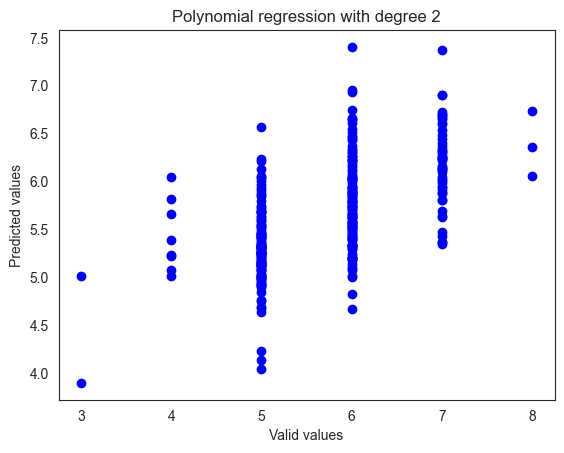

In [98]:

# Polynomial regression with degree 2
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

y_pred = model_poly.predict(X_test_poly)

mse = mean_squared_error(Y_test, y_pred)
accuracy = model_poly.score(X_test_poly, Y_test)
print("Polynomial regression with degree 2:")
print("MSE = {:.4f}".format(mse), "\nAccuracy = {:.4f}".format(accuracy))

plt.scatter(Y_test, y_pred, color='blue')
plt.xlabel('Valid values')
plt.ylabel('Predicted values')
plt.title('Polynomial regression with degree 2')
plt.show()